# Remapping

The function [](`~genominterv.remapping.interval_distance`) converts coordinates of one set of
genomic intervals into distances to the closest interval in a second set.

In [1]:
#| echo: false
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'

## Remapping functions

The function `remap` converts coordinates a single interval into distance to the closest interval in a second set:

In [2]:
from genominterv.remapping import remap

single_interval = (300, 400)
other_intervals = [(0, 100), (1000, 1100)]

remap(single_interval, other_intervals)

[(200, 300)]

Same but retaining info about which annotation the interval is proximal to:

In [3]:
remap((300, 400), [(0, 100), (1000, 1100)], include_prox_coord=True)

[(200, 300, 0, 100)]

The function `interval_distance` converts coordinates of one set of genomic intervals into distances to the closest interval in a second set. Using `relative=True` returns distances relative to the span between the two flanking annotation intervals.

In [4]:
annot = pd.DataFrame(dict(chrom='chrX', start=[1, 20], end=[2, 25]))
annot

,chrom,start,end
0,chrX,1,2
1,chrX,20,25


In [5]:
query = pd.DataFrame(dict(chrom='chrX', start=[3, 5], end=[15, 7], some_data=['foo', 'bar'], other_data=['A', 'B']))
query

,chrom,start,end,some_data,other_data
0,chrX,3,15,foo,A
1,chrX,5,7,bar,B


In [6]:
from genominterv.remapping import interval_distance

interval_distance(query, annot)

,start,end,chrom
0,1,9.0,chrX
1,-5,-9.0,chrX
2,3,5.0,chrX


In [7]:
from genominterv.remapping import interval_distance
import genominterv
print(genominterv.__file__)
interval_distance(query, annot, relative=True)

/Users/kmt/genominterv/genominterv/__init__.py


,start,end,chrom
0,0.055556,0.500000,chrX
1,-0.277778,-0.500000,chrX
2,0.166667,0.277778,chrX


The most useful function for most applications is `remap_interval_data`, which does the remapping while preserving all the information in the query data frame. It also reports the start and end coordinates before remapping (ends with `*_orig`) and the coordinates of the most proximal segment in the annotation set (`*_prox`).

In [8]:
from genominterv.remapping import remap_interval_data
remap_interval_data(query, annot)

,start,end,start_prox,end_prox,chrom,start_orig,end_orig,some_data,other_data
0,1,9.0,1,2,chrX,3,15,foo,A
1,-5,-9.0,20,25,chrX,3,15,foo,A
2,3,5.0,1,2,chrX,5,7,bar,B


In [9]:
remap_interval_data(query, annot, relative=True)

,start,end,start_prox,end_prox,chrom,start_orig,end_orig,some_data,other_data
0,0.055556,0.500000,1,2,chrX,3,15,foo,A
1,-0.277778,-0.500000,20,25,chrX,3,15,foo,A
2,0.166667,0.277778,1,2,chrX,5,7,bar,B


Make random and non-random dummy data and plot the relative distances between interval midpoints and the closest annotation interval.

In [ ]:
import seaborn as sns

n = 1000
a = np.sort(np.random.randint(1, 10_000_000, size=n))
annot = pd.DataFrame(dict(chrom='chrX', start=a, end=a+10))
q = np.sort(np.random.randint(1, 10_000_000, size=n))
query = pd.DataFrame(dict(chrom='chrX', start=q, end=q+10))
df1 = remap_interval_data(query, annot, relative=True)
df1['mid'] = (df1.start + df1.end) / 2
df1['absmid'] = df1.mid.abs()

# dummy data
a = np.sort(np.random.randint(1, 10_000_000, size=n))
annot = pd.DataFrame(dict(chrom='chrX', start=a, end=a+10))
q = a + np.random.randint(-1000, 1000, size=n)
query = pd.DataFrame(dict(chrom='chrX', start=q, end=q+10))
df2 = remap_interval_data(query, annot, relative=True)
df2['mid'] = (df2.start + df2.end) / 2
df2['absmid'] = df2.mid.abs()

<Axes: xlabel='start', ylabel='Count'>

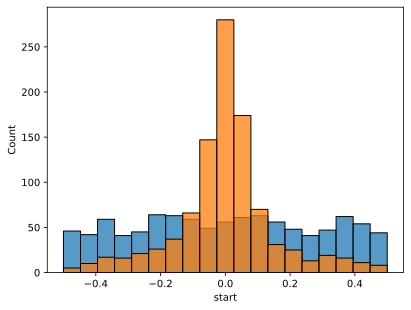

In [14]:
sns.histplot(df1, x='start', bins=np.linspace(-0.5, 0.5, 20))
sns.histplot(df2, x='start', bins=np.linspace(-0.5, 0.5, 20))

<Axes: xlabel='mid', ylabel='Count'>

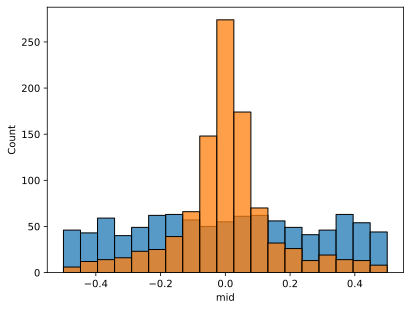

In [ ]:
sns.histplot(df1, x='mid', bins=np.linspace(-0.5, 0.5, 20))
sns.histplot(df2, x='mid', bins=np.linspace(-0.5, 0.5, 20))

The same but removing the sign since the distribution is symmetric:

<Axes: xlabel='absmid', ylabel='Count'>

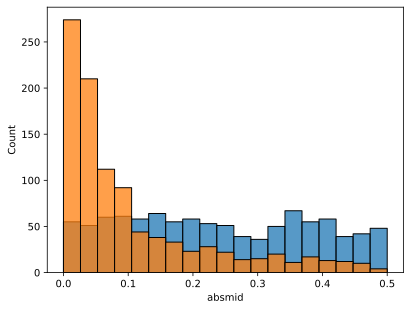

In [11]:
sns.histplot(df1, x='absmid', bins=np.linspace(0, 0.5, 20))
sns.histplot(df2, x='absmid', bins=np.linspace(0, 0.5, 20))

<Axes: xlabel='dist', ylabel='absmid'>

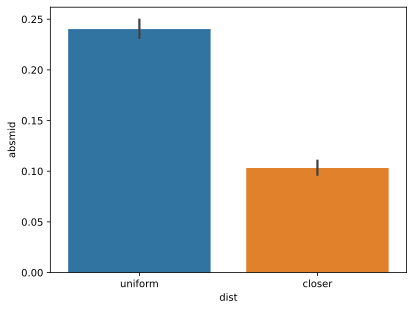

In [12]:
df1['dist'] = 'uniform'
df2['dist'] = 'closer'
df = pd.concat([df1, df2])
sns.barplot(df, y='absmid', x='dist', hue='dist')

<Axes: xlabel='mid', ylabel='Count'>

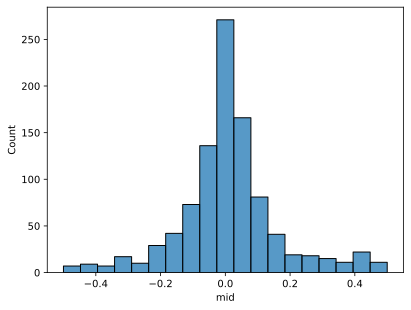

In [13]:
import seaborn as sns

# dummy data
n = 1000
a = np.sort(np.random.randint(1, 10_000_000, size=n))
annot = pd.DataFrame(dict(chrom='chrX', start=a, end=a+10))
q = a + np.random.randint(-1000, 1000, size=n)
query = pd.DataFrame(dict(chrom='chrX', start=q, end=q+10))
df = remap_interval_data(query, annot, relative=True)


df['mid'] = (df.start + df.end) / 2
sns.histplot(df, x='mid', bins=np.linspace(-0.5, 0.5, 20))